## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [69]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [70]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [3]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [7]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
6114,😁,5,1,smile,positive/negative,0,хрюкай больше свинка)😁
1712,😎,2,1,no_emotion,positive/negative,3,techno 😎
8467,😂,11,1,smile,positive/negative,0,так-то вы бы и убийцу не сдали? нехорошо жи😂
7349,🤣,4,1,smile,positive/negative,0,не тебя одного🤣
5269,😄,7,1,smile,positive/negative,0,ещё послезавтра человек паук горбатая гора 😄
...,...,...,...,...,...,...,...
4288,😂,4,1,smile,positive/negative,0,да это понятно😂
1462,😅,5,1,smile,positive/negative,0,подарок на день рождения 😅
2961,🤔,3,1,no_emotion,neutral/skeptical,1,меган?🤔
3448,😁,8,1,smile,positive/negative,0,ну пусть рискнёт чо...мы глянем😁


Выделяем данные для обучения

In [8]:
posts = train['clean_text']

In [9]:
posts[:5]

6114                          хрюкай больше свинка)😁
1712                                        techno 😎
8467    так-то вы бы и убийцу не сдали? нехорошо жи😂
7349                                 не тебя одного🤣
5269    ещё послезавтра человек паук горбатая гора 😄
Name: clean_text, dtype: object

Выделяем правильные ответы

In [78]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [79]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [81]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [82]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [83]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'это': 6,
 'что': 7,
 'я': 8,
 '😂': 9,
 'на': 10,
 '😁': 11,
 'так': 12,
 'как': 13,
 'у': 14,
 '😅': 15,
 'с': 16,
 'то': 17,
 'ну': 18,
 'ты': 19,
 '😄': 20,
 'да': 21,
 '🤔': 22,
 'же': 23,
 'вот': 24,
 'за': 25,
 'все': 26,
 'тоже': 27,
 'по': 28,
 'вы': 29,
 'уже': 30,
 '😉': 31,
 'мне': 32,
 '😏': 33,
 '😊': 34,
 'он': 35,
 'бы': 36,
 'просто': 37,
 'меня': 38,
 'когда': 39,
 '😆': 40,
 'только': 41,
 'если': 42,
 'для': 43,
 'из': 44,
 'есть': 45,
 '😍': 46,
 'ещё': 47,
 'она': 48,
 'там': 49,
 '😃': 50,
 'спасибо': 51,
 'от': 52,
 'кто': 53,
 'очень': 54,
 'к': 55,
 '😎': 56,
 'они': 57,
 'нет': 58,
 'но': 59,
 'будет': 60,
 '😳': 61,
 'надо': 62,
 'было': 63,
 'или': 64,
 '❤': 65,
 'может': 66,
 'тебе': 67,
 'можно': 68,
 'всё': 69,
 'где': 70,
 'без': 71,
 'этот': 72,
 'вообще': 73,
 'тебя': 74,
 'какой': 75,
 'даже': 76,
 'вас': 77,
 'вам': 78,
 'его': 79,
 'точно': 80,
 'лучше': 81,
 'до': 82,
 'тут': 83,
 'такой': 84,
 'тогда': 85,
 'о': 

Преобразуем посты в числовое представление

In [84]:
sequences = tokenizer.texts_to_sequences(posts)

In [85]:
index = 1
print(posts[index])
print(sequences[index])

как сесть на диету 😁
[1698, 3057]


In [86]:
tokenizer.word_index['сесть']

7850

Ограничиваем длину постов

In [87]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [88]:
x_train[:5]

array([[   0,    0,    0,    0,    0, 1697,   14,   77,  531, 3056,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1698, 3057],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3058, 3059, 3060],
       [   0,   18,   57, 1173,   29,   58, 1174,  870,   13,  286,   11],
       [   0,    0,    0,    0,    0,  617,   89,    6,   12,  259,    9]],
      dtype=int32)

In [89]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [90]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [91]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Сверточная нейронная сеть

In [92]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [93]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [94]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 32)            320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [95]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [96]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 1.7571 - accuracy: 0.6270 - f1_m: 0.3829 - precision_m: 0.4277 - recall_m: 0.3609
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_cnn.h5
52/52 [==============================] - 8s 119ms/step - loss: 1.7571 - accuracy: 0.6270 - f1_m: 0.3829 - precision_m: 0.4277 - recall_m: 0.3609 - val_loss: 1.2559 - val_accuracy: 0.6599 - val_f1_m: 0.6600 - val_precision_m: 0.6618 - val_recall_m: 0.6582
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 1.2016 - accuracy: 0.6400 - f1_m: 0.6467 - precision_m: 0.7502 - recall_m: 0.5755
Epoch 2: val_accuracy improved from 0.65989 to 0.66802, saving model to best_model_cnn.h5
52/52 [==============================] - 5s 99ms/step - loss: 1.2016 - accuracy: 0.6400 - f1_m: 0.6467 - precision_m: 0.7502 - recall_m: 0.5755 - val_loss: 1.0590 - val_accuracy: 0.6680 - val_f1_m: 0.6141 - val_precision_m: 0.8599 - val_recall_m: 0.4789
Epoch 3/5
52/52 

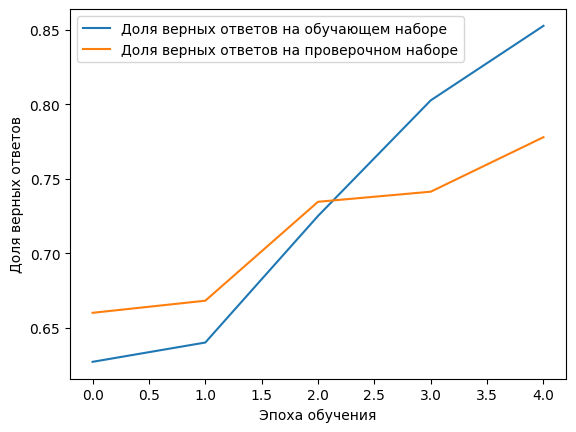

In [97]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [98]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [99]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [100]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_6 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [101]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [102]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 2.2573 - accuracy: 0.6122 - f1_m: 0.0871 - precision_m: 0.1225 - recall_m: 0.0785
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_lstm.h5
52/52 [==============================] - 10s 149ms/step - loss: 2.2573 - accuracy: 0.6122 - f1_m: 0.0871 - precision_m: 0.1225 - recall_m: 0.0785 - val_loss: 1.4560 - val_accuracy: 0.6599 - val_f1_m: 0.6621 - val_precision_m: 0.6635 - val_recall_m: 0.6608
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 1.4204 - accuracy: 0.6400 - f1_m: 0.6451 - precision_m: 0.6519 - recall_m: 0.6386
Epoch 2: val_accuracy did not improve from 0.65989
52/52 [==============================] - 3s 64ms/step - loss: 1.4204 - accuracy: 0.6400 - f1_m: 0.6451 - precision_m: 0.6519 - recall_m: 0.6386 - val_loss: 1.2600 - val_accuracy: 0.6599 - val_f1_m: 0.6639 - val_precision_m: 0.6670 - val_recall_m: 0.6608
Epoch 3/5
49/52 [===========================>..] - ET

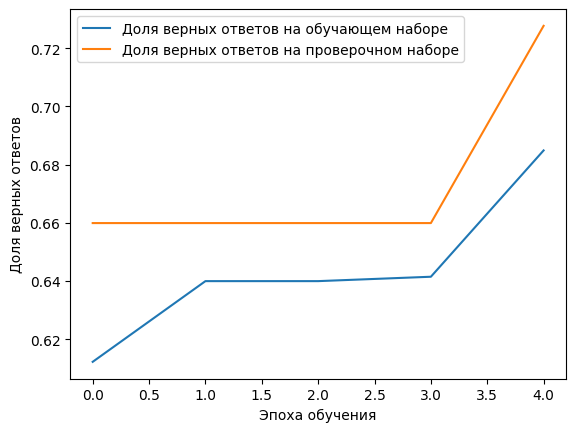

In [103]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [104]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [105]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [106]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru_1 (GRU)                 (None, 16)                2400      
                                                                 
 dense_7 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [107]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [108]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 2.4206 - accuracy: 0.6067 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_gru.h5
52/52 [==============================] - 10s 125ms/step - loss: 2.4206 - accuracy: 0.6067 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.6746 - val_accuracy: 0.6599 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 1.3910 - accuracy: 0.6400 - f1_m: 0.5833 - precision_m: 0.6783 - recall_m: 0.5537
Epoch 2: val_accuracy did not improve from 0.65989
52/52 [==============================] - 2s 43ms/step - loss: 1.3910 - accuracy: 0.6400 - f1_m: 0.5833 - precision_m: 0.6783 - recall_m: 0.5537 - val_loss: 1.1734 - val_accuracy: 0.6599 - val_f1_m: 0.7166 - val_precision_m: 0.7847 - val_recall_m: 0.6595
Epoch 3/5
48/52 [=

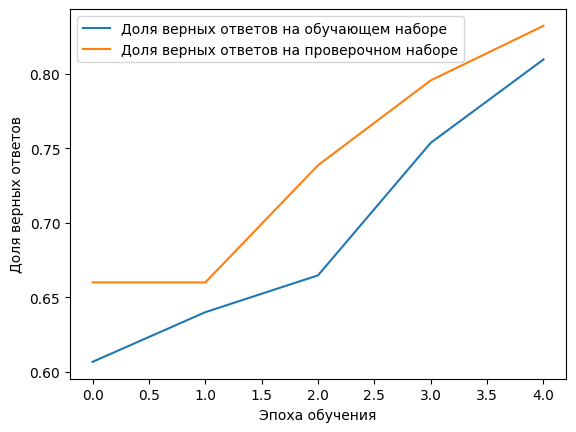

In [109]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [10]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
8786,😂,2,1,smile,positive/negative,0,козероги 😂
9115,😂,10,1,smile,positive/negative,0,всё...... надо заново все снимать. нет гормонами😂
7473,😍,3,1,joy,positive,2,оо джозеф 😍
1961,😉,5,1,smile,positive/negative,0,не будьте такими озабочеными😉
1324,❤,8,1,joy,positive,2,"какой малыш, какое счастье, что спасли его❤"
...,...,...,...,...,...,...,...
1305,❤,6,1,joy,positive,2,мамуля подарила танец своему сыночку❤
3381,🤓,6,1,no_emotion,neutral/skeptical,1,и мне пожалуйста если можно 🤓
525,😅,5,1,smile,positive/negative,0,"лучше так, чем никак 😅"
2152,🤣,5,1,smile,positive/negative,0,тот кому лайки нужны 🤣


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [111]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [112]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [113]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,   81, 4838],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  530,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   56],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  910]],
      dtype=int32)

Правильные ответы

In [114]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [115]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [116]:
model_cnn.load_weights(model_cnn_save_path)

In [117]:
loss, accuracy, f1_score, precision, recall = model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.9225 - accuracy: 0.7755 - f1_m: 0.7622 - precision_m: 0.9079 - recall_m: 0.6601


### Сеть LSTM

In [118]:
model_lstm.load_weights(model_lstm_save_path)

In [119]:
loss, accuracy, f1_score, precision, recall = model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 4ms/step - loss: 0.9867 - accuracy: 0.7180 - f1_m: 0.7398 - precision_m: 0.8595 - recall_m: 0.6526


### Сеть GRU

In [120]:
model_gru.load_weights(model_gru_save_path)

In [121]:
loss, accuracy, f1_score, precision, recall = model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 4ms/step - loss: 0.7801 - accuracy: 0.8140 - f1_m: 0.8113 - precision_m: 0.8768 - recall_m: 0.7569


In [123]:
#test['clean_text'][2384]
test['clean_text'][1246]

'махнем со мной на небо ❤'

In [124]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][1246], test['emotion'][1246], test['tonality'][1246]

(2, 'joy', 'positive')

In [125]:
#text = test['clean_text'][2384]
text = test['clean_text'][1246]

In [126]:
sequence = tokenizer.texts_to_sequences([text])

In [127]:
sequence

[[160, 2499, 10, 5755, 65]]

In [128]:
data = pad_sequences(sequence, maxlen=max_len)

In [129]:
data

array([[   0,    0,    0,    0,    0,    0,  160, 2499,   10, 5755,   65]],
      dtype=int32)

In [130]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [131]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 113ms/step


In [132]:
result_cnn

array([[6.2915149e-07, 2.3769756e-08, 9.6736389e-01, 3.2609507e-02,
        3.1181114e-06, 3.0593328e-06, 1.2328101e-05, 2.3369171e-06,
        2.8153190e-06, 2.0125110e-06, 2.4893010e-08, 1.4778533e-07,
        3.5471864e-08, 4.1117461e-09, 3.6581020e-09]], dtype=float32)

### Сеть LSTM

In [133]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 1s 527ms/step


In [134]:
result_lstm

array([[0.27915192, 0.1656385 , 0.18350561, 0.1160849 , 0.06381443,
        0.01981834, 0.0279653 , 0.02560182, 0.01316241, 0.02738853,
        0.01437433, 0.01244063, 0.01475581, 0.01560424, 0.02069327]],
      dtype=float32)

### Сеть GRU

In [135]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 475ms/step


In [136]:
result_gru

array([[0.02885247, 0.08063968, 0.6681473 , 0.07070346, 0.01876859,
        0.01344686, 0.02082388, 0.0250547 , 0.01140031, 0.00619735,
        0.02137522, 0.00703477, 0.00758998, 0.0151192 , 0.00484613]],
      dtype=float32)